In [18]:
import requests
import json
response_API = requests.get('http://bechdeltest.com/api/v1/getAllMovies')
print(response_API)

<Response [200]>


In [2]:
data = response_API.text
#df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [3]:
new=json.loads(data)
new

[{'imdbid': '3155794',
  'id': 9602,
  'title': 'Passage de Venus',
  'year': 1874,
  'rating': 0},
 {'rating': 0,
  'year': 1877,
  'title': 'La Rosace Magique',
  'id': 9804,
  'imdbid': '14495706'},
 {'year': 1878,
  'rating': 0,
  'title': 'Sallie Gardner at a Gallop',
  'id': 9603,
  'imdbid': '2221420'},
 {'id': 9806,
  'title': 'Le singe musicien',
  'imdbid': '12592084',
  'rating': 0,
  'year': 1878},
 {'rating': 0,
  'year': 1881,
  'title': 'Athlete Swinging a Pick',
  'id': 9816,
  'imdbid': '7816420'},
 {'year': 1883,
  'rating': 0,
  'imdbid': '5459794',
  'id': 9831,
  'title': 'Buffalo Running'},
 {'rating': 0,
  'year': 1885,
  'id': 9832,
  'title': 'L&#39;homme machine',
  'imdbid': '8588366'},
 {'imdbid': '2075247',
  'title': 'Man Walking Around the Corner',
  'id': 9614,
  'year': 1887,
  'rating': 0},
 {'id': 9836,
  'title': 'Cockatoo Flying',
  'imdbid': '8133192',
  'year': 1887,
  'rating': 0},
 {'rating': 0,
  'year': 1887,
  'title': 'Child Carrying Flowers

In [4]:
import urllib,json
import pandas as pd

In [5]:
df=pd.DataFrame.from_dict(new)
df

,imdbid,id,title,year,rating
0,3155794,9602,Passage de Venus,1874,0
1,14495706,9804,La Rosace Magique,1877,0
2,2221420,9603,Sallie Gardner at a Gallop,1878,0
3,12592084,9806,Le singe musicien,1878,0
4,7816420,9816,Athlete Swinging a Pick,1881,0
...,...,...,...,...,...
9326,11804152,10083,Till Death,2021,0
9327,4244994,10085,"Last Duel, The",2021,3
9328,7097896,10092,Venom Let there be Carnage,2021,2
9329,10763820,10114,Night Teeth,2021,2


In [6]:
dfNew=df[df['year']>=2010]

In [7]:
dfNew.head()

,imdbid,id,title,year,rating
5815,0455407,694,"Crazies, The",2010,3
5816,1014759,699,Alice in Wonderland,2010,3
5817,1305583,702,Our Family Wedding,2010,3
5818,0947810,704,Green Zone,2010,0
5819,1196141,705,Diary of a Wimpy Kid,2010,3


In [8]:
dfNew.rename(columns={'rating':'Bechdel Score'},inplace=True)

C:\Users\shuba\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')

<ipython-input-9-d3c00990c827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')


In [10]:
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)

<ipython-input-10-378f9b54b4fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)


<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

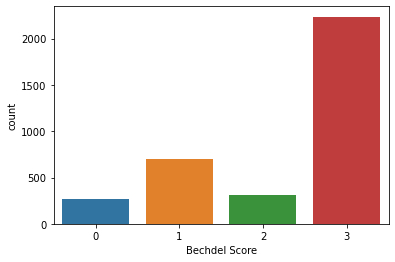

In [11]:
import seaborn as sns
sns.countplot(x='Bechdel Score',data=dfNew)

In [12]:
li=[]
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test']=li
dfNew

<ipython-input-12-3f2379d808d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['pass_test']=li


,imdbid,id,title,year,Bechdel Score,pass_test
5815,0455407,694,"Crazies, The",2010-01-01,3,1
5816,1014759,699,Alice in Wonderland,2010-01-01,3,1
5817,1305583,702,Our Family Wedding,2010-01-01,3,1
5818,0947810,704,Green Zone,2010-01-01,0,0
5819,1196141,705,Diary of a Wimpy Kid,2010-01-01,3,1
...,...,...,...,...,...,...
9326,11804152,10083,Till Death,2021-01-01,0,0
9327,4244994,10085,"Last Duel, The",2021-01-01,3,1
9328,7097896,10092,Venom Let there be Carnage,2021-01-01,2,0
9329,10763820,10114,Night Teeth,2021-01-01,2,0


<AxesSubplot:xlabel='pass_test', ylabel='count'>

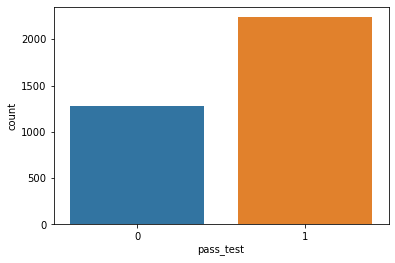

In [13]:
sns.countplot(x='pass_test',data=dfNew)

In [14]:
!pip install plotnine


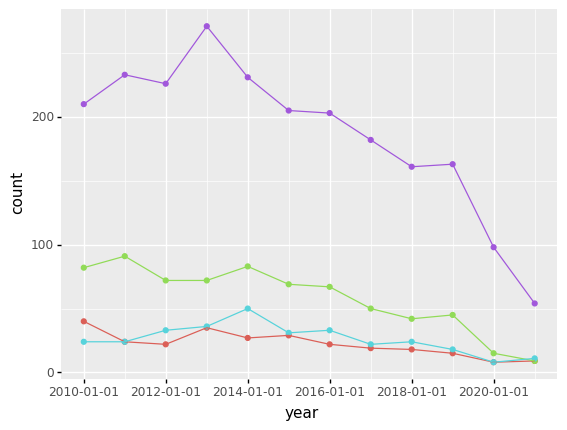

<ggplot: (149723684081)>

In [15]:
from plotnine import *
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))

In [28]:
df1=pd.read_csv("movies.txt")
df1.to_csv('movies.csv',index=None)

In [27]:
imdb=pd.read_csv('movies.csv')
imdbNew=imdb[['title','rating']]

dfNew=pd.merge(dfNew,imdbNew,how='left',left_on=['title'],right_on=['title'])

dfNew.head()

,imdbid,title,year,Bechdel Score,pass_test,rating_x,rating_y,rating
0,0455407,"Crazies, The",2010-01-01,3,1,5.7,5.7,5.7
1,1014759,Alice in Wonderland,2010-01-01,3,1,5.7,5.7,5.7
2,1014759,Alice in Wonderland,2010-01-01,3,1,5.7,5.7,6.4
3,1014759,Alice in Wonderland,2010-01-01,3,1,5.7,5.7,5.6
4,1014759,Alice in Wonderland,2010-01-01,3,1,5.7,5.7,6.4


In [29]:
#visualizing the relationship between bechdel score, year and imdb ratings
dfNew=dfNew.dropna()
new=dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()

new.head()

,year,Bechdel Score,rating
0,2010-01-01,0,5.800000
1,2010-01-01,1,6.153191
2,2010-01-01,2,6.672059
3,2010-01-01,3,6.167562
4,2011-01-01,0,6.850000


C:\Users\shuba\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\shuba\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


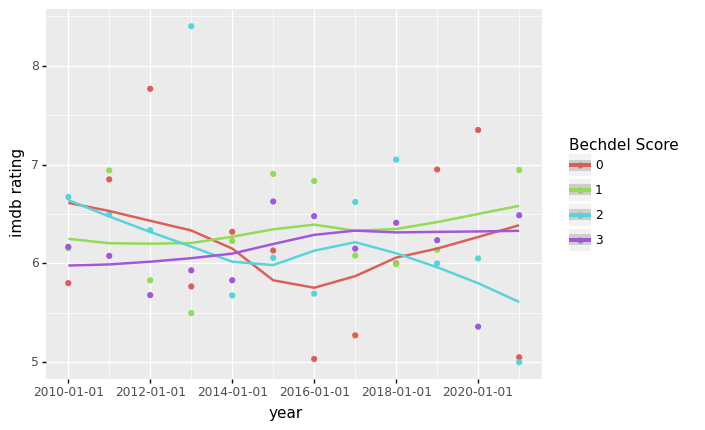

<ggplot: (149723839952)>

In [30]:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score')

In [ ]:
#visualizing the relationship between the genderof director and the rating